In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("Company Stock and Investment.csv")
df.head(10)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041
7,12-01-2010,-0.021202,-0.001518,-0.011375,-0.022715
8,13-01-2010,-0.013987,-0.020847,0.014106,0.013820
9,14-01-2010,-0.003892,0.009758,-0.005792,-0.013632


In [14]:
#Lets check shape
df.shape

(1984, 5)

In [15]:
#Lets check null values
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [16]:
#As our concern is only regarding the predictions on oil and gold we will simply drop the remaining column
df.drop(['Comp Stock','Other sharesInvestments'],axis=1,inplace=True)
df.head(10)

,Date,Oil Investments,Gold Investments
0,31-12-2009,0.025417,0.000150
1,04-01-2010,0.026830,0.001097
2,05-01-2010,0.002699,0.001560
3,06-01-2010,0.021688,0.006009
4,07-01-2010,-0.006256,0.000221
5,08-01-2010,0.001269,-0.013097
6,11-01-2010,-0.002417,0.023297
7,12-01-2010,-0.021202,-0.001518
8,13-01-2010,-0.013987,-0.020847
9,14-01-2010,-0.003892,0.009758


In [22]:
df.describe()

,Oil Investments,Gold Investments
count,1984.000000,1984.000000
mean,-0.000435,-0.020152
std,0.030869,0.140965
min,-1.000000,-1.000000
25%,-0.011021,-0.005881
50%,0.000277,0.000000
75%,0.010734,0.005454
max,0.119511,0.049577


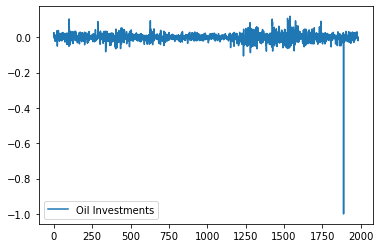

In [25]:
df[['Oil Investments']].plot()

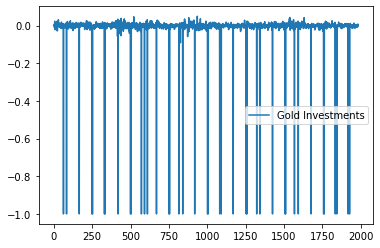

In [26]:
df[['Gold Investments']].plot()

In [28]:
#Testing for Stationary
from statsmodels.tsa.stattools import adfuller



In [31]:
test_results1 = adfuller(df['Oil Investments'])

In [32]:
print(test_results1)

(-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


In [33]:
test_results2 = adfuller(df['Gold Investments'])
print(test_results2)

(-15.906853851669043, 8.208405770369246e-29, 7, 1976, {'1%': -3.4336636717018405, '5%': -2.8630037919874423, '10%': -2.567549261922421}, -2147.421096479902)


In [42]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Oil_Investments):
    result=adfuller(Oil_Investments) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [43]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [45]:
#Lets check with gold investment 
def adfuller_test(Gold_Investments):
    result=adfuller(Gold_Investments) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")


In [46]:
adfuller_test(df['Gold Investments'])

ADF Test Statistic : -15.906853851669043
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [47]:
#Here we can see that The data is stationary in oil as well as gold investment 


In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
model1=ARIMA(df['Oil Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model1_fit=model1.fit()

In [56]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4081.135
Method:                       css-mle   S.D. of innovations              0.031
Date:                Sun, 01 Nov 2020   AIC                          -8154.270
Time:                        18:59:01   BIC                          -8131.901
Sample:                             1   HQIC                         -8146.053
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.541e-06   1.17e-06     -1.315      0.188   -3.84e-06    7.56e-07
ar.L1.D.Oil Investments    -0.0319      0.022     -1.419      0.156      -0.076       0.012
ma.L1.D.Oil Investments    -1.0000      0.001   -736.728      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.3874           +0.0000j           31.3874            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

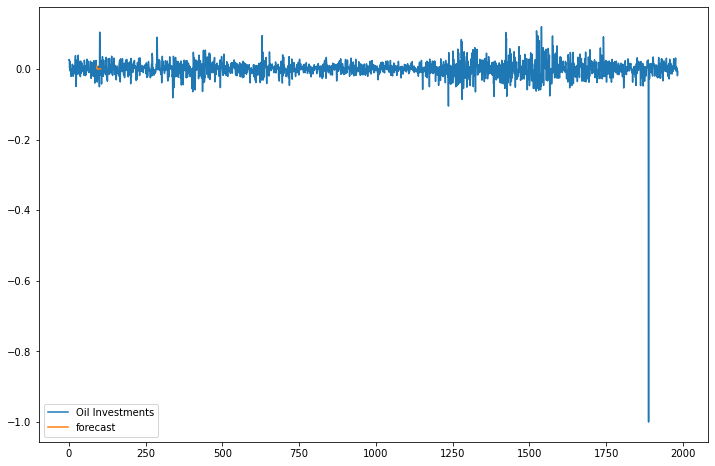

In [58]:
df['forecast']=model1_fit.predict(start=90,end=103,dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [59]:
model2=ARIMA(df['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model2_fit=model1.fit()

In [60]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4081.135
Method:                       css-mle   S.D. of innovations              0.031
Date:                Sun, 01 Nov 2020   AIC                          -8154.270
Time:                        19:01:33   BIC                          -8131.901
Sample:                             1   HQIC                         -8146.053
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.541e-06   1.17e-06     -1.315      0.188   -3.84e-06    7.56e-07
ar.L1.D.Oil Investments    -0.0319      0.022     -1.419      0.156      -0.076       0.012
ma.L1.D.Oil Investments    -1.0000      0.001   -736.728      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.3874           +0.0000j           31.3874            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

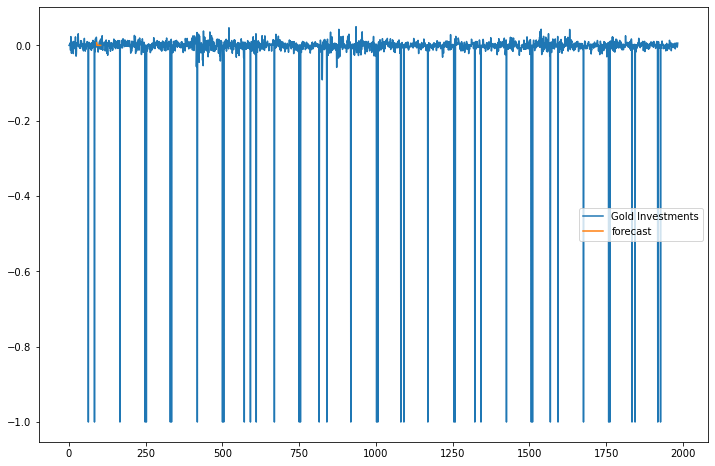

In [61]:
df['forecast']=model2_fit.predict(start=90,end=103,dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))